# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL to make API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create lists for dataframe
city_list = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []
cities_list = []

# Calculation for city number
counter = 1
set_no = 1

# Print opening text
print("Beginning Data Retrieval")
print("-----------------------------")

# Create loop for cities
for c, city in enumerate(cities):
    
    if (c % 50 == 0 and c>= 50):
        counter = 1
        set_no += 1
       
    city_url = url + "&q=" + city
    print(f"Processing Record {counter} of Set {set_no} | {city}")
    
    counter += 1
    # Call API to retrieve each city
    try:
        response = requests.get(city_url).json()
        cities_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt']) 
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
    except Exception:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | alekseyevka
Processing Record 2 of Set 1 | antiguo morelos
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | prince rupert
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | gagnoa
Processing Record 20 of Set 1 | belushya guba
Ci

City not found. Skipping...
Processing Record 37 of Set 4 | healdsburg
Processing Record 38 of Set 4 | halalo
City not found. Skipping...
Processing Record 39 of Set 4 | mayo
Processing Record 40 of Set 4 | kpandae
Processing Record 41 of Set 4 | sangar
Processing Record 42 of Set 4 | beira
Processing Record 43 of Set 4 | shakawe
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | dalvik
Processing Record 46 of Set 4 | sabha
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | santiago del estero
Processing Record 49 of Set 4 | sao jose da coroa grande
Processing Record 50 of Set 4 | kenai
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | shingu
Processing Record 3 of Set 5 | north bend
Processing Record 4 of Set 5 | binzhou
Processing Record 5 of Set 5 | tombouctou
Processing Record 6 of Set 5 | nadigaon
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | beloha
Processing Rec

Processing Record 27 of Set 8 | casas grandes
Processing Record 28 of Set 8 | vardo
Processing Record 29 of Set 8 | port macquarie
Processing Record 30 of Set 8 | mandera
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | kuche
City not found. Skipping...
Processing Record 33 of Set 8 | along
Processing Record 34 of Set 8 | ofunato
Processing Record 35 of Set 8 | high level
Processing Record 36 of Set 8 | tiarei
Processing Record 37 of Set 8 | broceni
Processing Record 38 of Set 8 | khormuj
City not found. Skipping...
Processing Record 39 of Set 8 | braedstrup
Processing Record 40 of Set 8 | samarai
Processing Record 41 of Set 8 | georgetown
Processing Record 42 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 43 of Set 8 | lima
Processing Record 44 of Set 8 | khromtau
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | gunjur
Processing Record 47 of Set 8 | sokoto
Processing Record 48 of Set 8 | pavilosta
Proc

Processing Record 9 of Set 12 | vicksburg
Processing Record 10 of Set 12 | batagay-alyta
Processing Record 11 of Set 12 | road town
Processing Record 12 of Set 12 | necochea
Processing Record 13 of Set 12 | marawi
Processing Record 14 of Set 12 | qaqortoq
Processing Record 15 of Set 12 | yar-sale
Processing Record 16 of Set 12 | pacific grove
Processing Record 17 of Set 12 | mount hagen
Processing Record 18 of Set 12 | axim
Processing Record 19 of Set 12 | volary
Processing Record 20 of Set 12 | jaumave
Processing Record 21 of Set 12 | leshukonskoye
Processing Record 22 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 23 of Set 12 | itoman
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | marzuq
Processing Record 26 of Set 12 | adrano
Processing Record 27 of Set 12 | pueblo nuevo
Processing Record 28 of Set 12 | plettenberg bay
Processing Record 29 of Set 12 | jieshou
Processing Record 30 of Set 12 | kangaba
Processing Record 31 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":cities_list,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
    }
weather = pd.DataFrame(weather_dict)
weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alekseyevka,50.63,38.69,56.21,43,6,14.97,RU,1601172662
1,Antiguo Morelos,22.55,-99.08,86.00,58,0,5.99,MX,1601172662
2,Hermanus,-34.42,19.23,42.01,94,80,1.01,ZA,1601172663
3,Kapaa,22.08,-159.32,84.20,66,20,11.41,US,1601172663
4,Hobart,-42.88,147.33,55.00,51,40,14.99,AU,1601172646
...,...,...,...,...,...,...,...,...,...
553,Røros,62.57,11.38,37.40,100,95,2.82,NO,1601172803
554,Severnyy,50.68,36.55,59.00,41,0,15.66,RU,1601172803
555,Tefé,-3.35,-64.71,72.57,96,100,1.81,BR,1601172803
556,Udachny,66.42,112.40,32.00,77,90,6.71,RU,1601172804


In [5]:
weather.to_csv("cities.csv", index=False, header=True)

In [6]:
len(countries)

558

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = weather.loc[(weather['Humidity'] < 100)]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alekseyevka,50.63,38.69,56.21,43,6,14.97,RU,1601172662
1,Antiguo Morelos,22.55,-99.08,86.00,58,0,5.99,MX,1601172662
2,Hermanus,-34.42,19.23,42.01,94,80,1.01,ZA,1601172663
3,Kapaa,22.08,-159.32,84.20,66,20,11.41,US,1601172663
4,Hobart,-42.88,147.33,55.00,51,40,14.99,AU,1601172646
...,...,...,...,...,...,...,...,...,...
552,Batagay,67.63,134.63,40.91,83,100,5.06,RU,1601172803
554,Severnyy,50.68,36.55,59.00,41,0,15.66,RU,1601172803
555,Tefé,-3.35,-64.71,72.57,96,100,1.81,BR,1601172803
556,Udachny,66.42,112.40,32.00,77,90,6.71,RU,1601172804


In [27]:
# Export the City_Data into a csv
clean_city_data.to_csv("clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

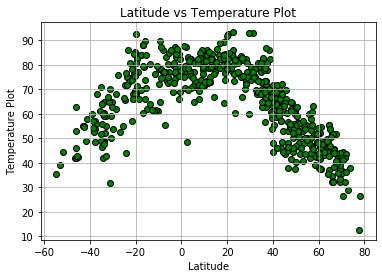

In [28]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolors = "black", facecolors= "green")
plt.title("Latitude vs Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature Plot")
plt.grid()
plt.savefig("Visualisations/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

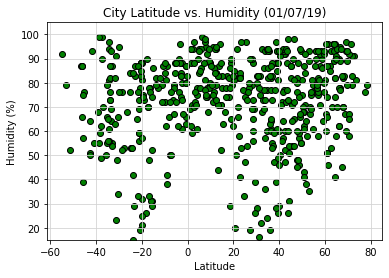

In [29]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Visualisations/lat_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

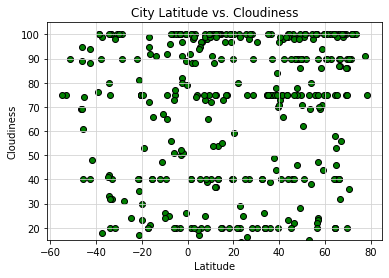

In [30]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Visualisations/lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

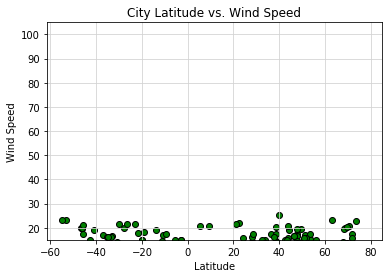

In [31]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Visualisations/lat_wind.png")
plt.show()

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(linregress(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [39]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.67


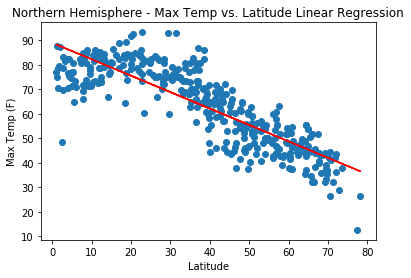

In [40]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Visualisations/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.74


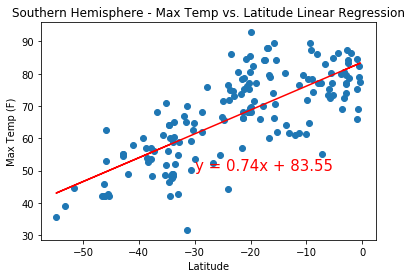

In [41]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Visualisations/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01


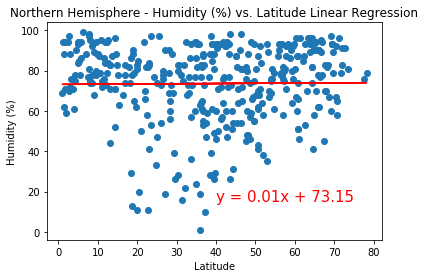

In [42]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Visualisations/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.13


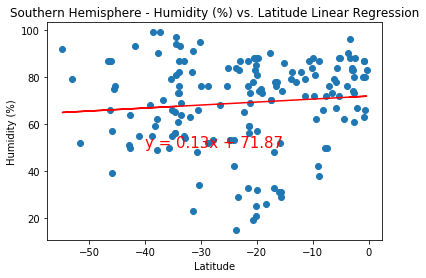

In [43]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Visualisations/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


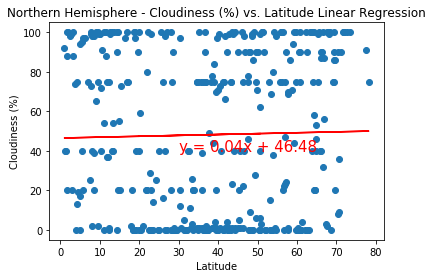

In [44]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Visualisations/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21


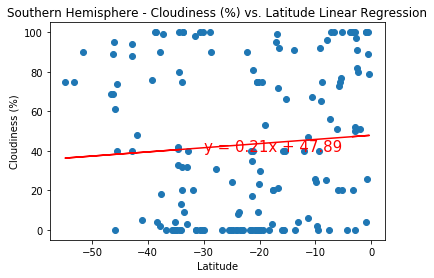

In [45]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Visualisations/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


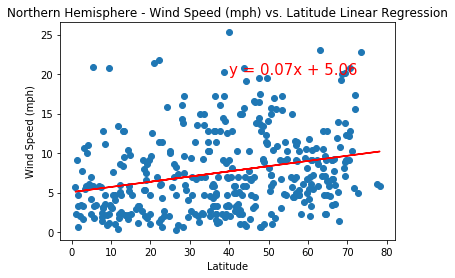

In [46]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Visualisations/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.13


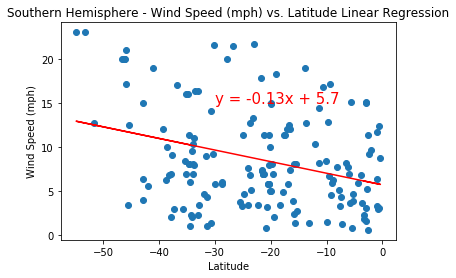

In [47]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Visualisations/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")